# Inhaltsverzeichnis

| Abschnitt | Unterabschnitt |
|-----------|----------------|
| **[Saisonale Analyse von Umweltdaten und Feuerzählungen](#saisonale-analyse-von-umweltdaten-und-feuerzaehlungen)** | [Geteilte Abbildungen von Variable](#geteilte-abbildungen-von-variable) |


## Saisonale Analyse von Umweltdaten und Feuerzählungen

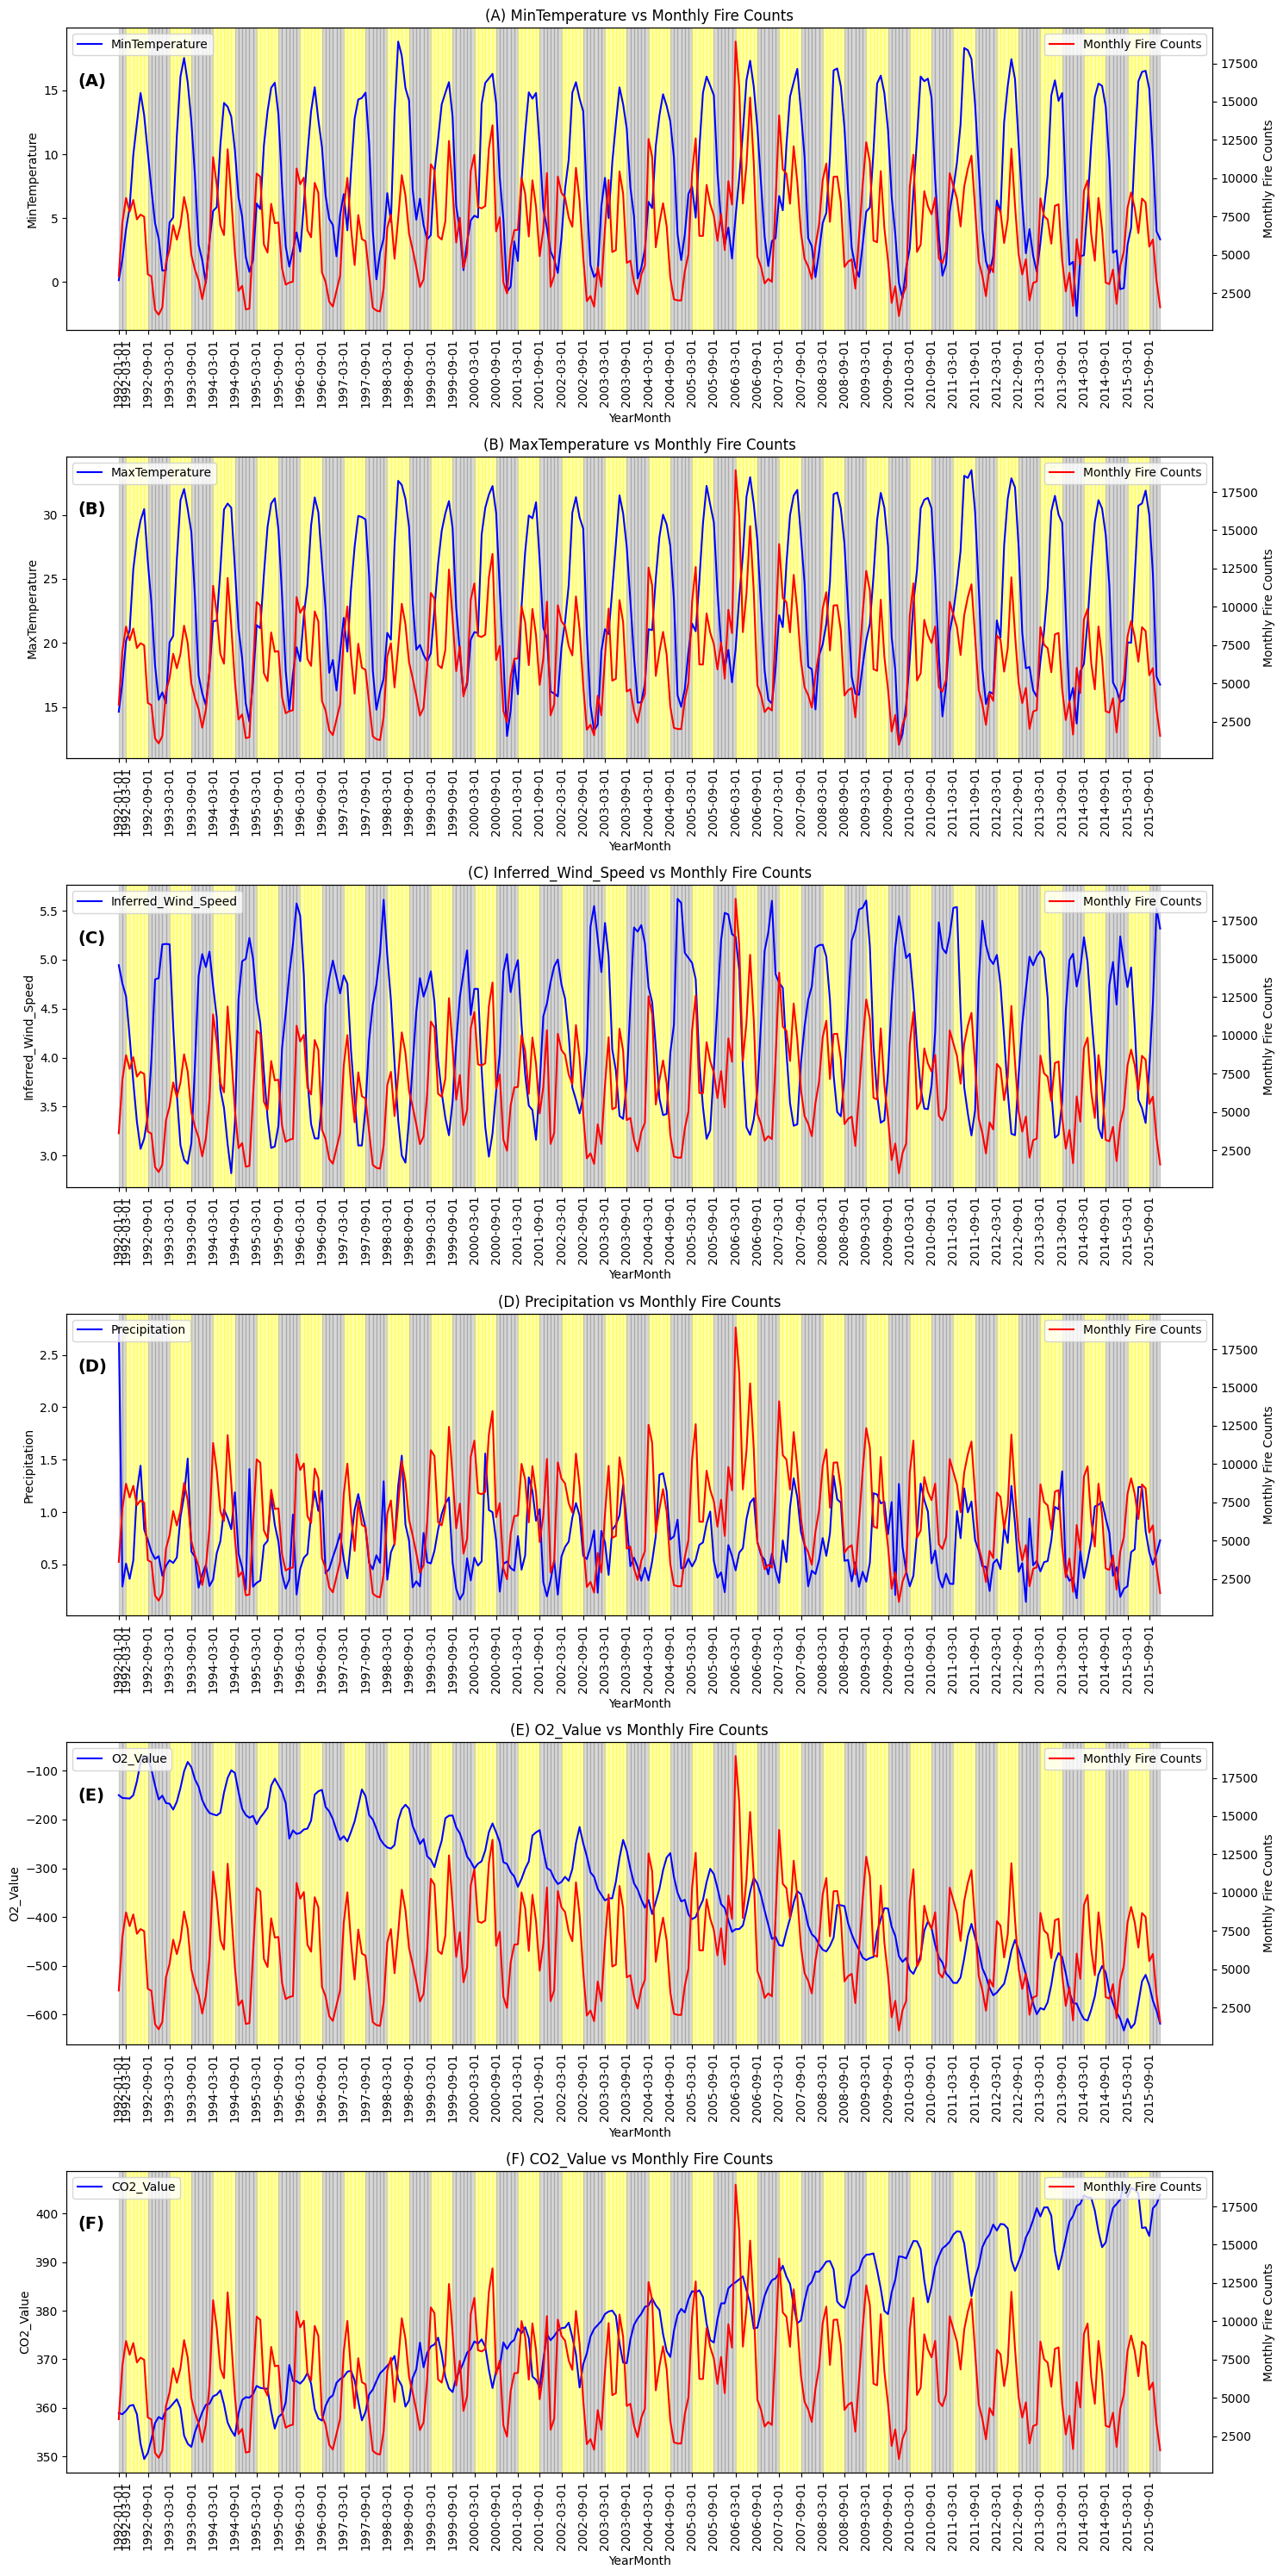

Figure saved at: ./Abbildungen\Environmental_variables_time_series.png


In [5]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os

# Define the path to the merged data file
merged_data_path = 'Data_Waldbrand_Zeitreihen/monthly_data_merged/merged_monthly_with_o2_co2_fire_counts.csv'

# Load the merged fire counts data
merged_with_fire_counts = pd.read_csv(merged_data_path, parse_dates=['YearMonth'])
colors = merged_with_fire_counts['Month'].apply(lambda x: 'yellow' if 3 <= x <= 8 else 'gray')

# Define the variables to plot
variables = ['MinTemperature', 'MaxTemperature', 'Inferred_Wind_Speed', 'Precipitation', 'O2_Value', 'CO2_Value']

# Create subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(15, 5 * len(variables)))

# Add distinctive letters for each subplot
letters = ['A', 'B', 'C', 'D', 'E', 'F']

# Plot each variable against fire counts
for i, variable in enumerate(variables):
    ax = axes[i]
    ax2 = ax.twinx()
    
    # Plot the variable
    ax.plot(merged_with_fire_counts['YearMonth'].astype(str), merged_with_fire_counts[variable], color='blue', label=variable)
    
    # Plot the fire counts on the second y-axis
    ax2.plot(merged_with_fire_counts['YearMonth'].astype(str), merged_with_fire_counts['Monthly Fire Counts'], color='red', label='Monthly Fire Counts')
    
    # Set titles and labels
    ax.set_title(f'({letters[i]}) {variable} vs Monthly Fire Counts')
    ax.set_xlabel('YearMonth')
    ax.set_ylabel(variable)
    ax2.set_ylabel('Monthly Fire Counts')

    # Set x-axis major locator to 6 months interval
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=90)

    # Label only the points where the color changes
    unique_colors = colors[colors != colors.shift()].index
    ax.set_xticks(merged_with_fire_counts['YearMonth'].astype(str).iloc[unique_colors])
    ax.set_xticklabels(merged_with_fire_counts['YearMonth'].astype(str).iloc[unique_colors])

    # Add background color bars
    for j in range(len(colors) - 1):
        ax.axvspan(merged_with_fire_counts['YearMonth'].astype(str).iloc[j], merged_with_fire_counts['YearMonth'].astype(str).iloc[j+1], color=colors.iloc[j], alpha=0.3)
    
    # Add legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Add subplot letter
    ax.text(0.01, 0.85, f'({letters[i]})', transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

plt.tight_layout()

# Define the path to save the figure
output_dir = "./Abbildungen"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Environmental_variables_time_series.png")

# Save the figure
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Figure saved at: {output_path}")


## Geteilte Abbildungen von Variable

In [4]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import os

# Define the path to the merged data file
merged_data_path = 'Data_Waldbrand_Zeitreihen/monthly_data_merged/merged_monthly_with_o2_co2_fire_counts.csv'

# Load the merged fire counts data
merged_with_fire_counts = pd.read_csv(merged_data_path, parse_dates=['YearMonth'])
colors = merged_with_fire_counts['Month'].apply(lambda x: 'yellow' if 3 <= x <= 8 else 'gray')

# Define the variables to plot
variables = ['MinTemperature', 'MaxTemperature', 'Inferred_Wind_Speed', 'Precipitation', 'O2_Value', 'CO2_Value']

# Define the output directory for individual plots
output_dir = "./Abbildungen"
os.makedirs(output_dir, exist_ok=True)

# Add distinctive letters for each plot
letters = ['A', 'B', 'C', 'D', 'E', 'F']

# Plot each variable in a separate figure
for i, variable in enumerate(variables):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax2 = ax.twinx()
    
    # Plot the variable
    ax.plot(merged_with_fire_counts['YearMonth'], merged_with_fire_counts[variable], color='blue', label=variable)
    
    # Plot the fire counts on the second y-axis
    ax2.plot(merged_with_fire_counts['YearMonth'], merged_with_fire_counts['Monthly Fire Counts'], color='red', label='Monthly Fire Counts')
    
    # Set titles and labels
    ax.set_title(f'({letters[i]}) {variable} vs Monthly Fire Counts')
    ax.set_xlabel('YearMonth')
    ax.set_ylabel(variable)
    ax2.set_ylabel('Monthly Fire Counts')

    # Set x-axis major locator to 6 months interval
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=90)

    # Add background color bars for seasonal highlighting
    for j in range(len(colors) - 1):
        ax.axvspan(
            merged_with_fire_counts['YearMonth'].iloc[j],
            merged_with_fire_counts['YearMonth'].iloc[j + 1],
            color=colors.iloc[j], alpha=0.3
        )
    
    # Add legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Save each plot with a unique filename
    output_path = os.path.join(output_dir, f"{variable}_time_series.png")
    plt.tight_layout()
    plt.savefig(output_path, dpi=300)
    plt.close(fig)  # Close the figure to save memory

    print(f"Figure saved for {variable}: {output_path}")


Figure saved for MinTemperature: ./Abbildungen\MinTemperature_time_series.png
Figure saved for MaxTemperature: ./Abbildungen\MaxTemperature_time_series.png
Figure saved for Inferred_Wind_Speed: ./Abbildungen\Inferred_Wind_Speed_time_series.png
Figure saved for Precipitation: ./Abbildungen\Precipitation_time_series.png
Figure saved for O2_Value: ./Abbildungen\O2_Value_time_series.png
Figure saved for CO2_Value: ./Abbildungen\CO2_Value_time_series.png
